In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./data/AviationData.csv",encoding = 'ISO-8859-1',low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
df.describe(include=object)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


# Data Cleaning

* Check for duplicate rows and remove them if exists
* Drop columns with over 50% missing values
* Drop records of not Accidents in United States
* Convert Date to a datetime, add a Year & Month column

In [7]:
#Check if there is any duplicate row
df.duplicated().sum()

0

In [8]:
# Calculate the percentage of values being NaN for each column
rows = len(df)
missing = df.isna().sum()
percentage_missing = missing / rows
percentage_missing_df = pd.DataFrame({'Missing' : percentage_missing})

In [9]:
#printing columns with more than 50% missing values
print(percentage_missing_df[percentage_missing_df['Missing'] > 0.5])

                    Missing
Latitude           0.613203
Longitude          0.613304
Aircraft.Category  0.636772
FAR.Description    0.639742
Schedule           0.858453
Air.carrier        0.812710


In [10]:
# Drop columns with over 50% missing values
cols_to_drop = list(percentage_missing_df[percentage_missing_df['Missing'] > 0.5].index)
df.drop(columns = cols_to_drop, axis = 1, inplace = True)

In [11]:
# Drop Accident Number, Airport Code, publication date and Registration Number
df.drop(columns=['Accident.Number','Airport.Code','Registration.Number','Publication.Date'],inplace=True)
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,Stinson,108-3,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,Piper,PA24-180,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,Cessna,172M,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,Rockwell,112,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,Cessna,501,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [12]:
# Drop records not Accidents in United States
before = len(df)
df = df[(df['Investigation.Type'] == 'Accident') & (df['Country'] == 'United States')]
dropped = before - len(df)
print(str(dropped) + ' rows dropped.')

8983 rows dropped.


In [13]:
# Convert Date to a datetime, add a Year & Month column
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Name'] = df['Event.Date'].dt.day_name().str[:3]

In [14]:
# Remove data before 1982
df = df[df['Year'] >= 1982]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79899 entries, 7 to 88888
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                79899 non-null  object        
 1   Investigation.Type      79899 non-null  object        
 2   Event.Date              79899 non-null  datetime64[ns]
 3   Location                79888 non-null  object        
 4   Country                 79899 non-null  object        
 5   Airport.Name            50000 non-null  object        
 6   Injury.Severity         79847 non-null  object        
 7   Aircraft.damage         78775 non-null  object        
 8   Make                    79887 non-null  object        
 9   Model                   79870 non-null  object        
 10  Amateur.Built           79884 non-null  object        
 11  Number.of.Engines       78141 non-null  float64       
 12  Engine.Type             77001 non-null  object

In [15]:
# Titlecase of Make column
df['Make'] = df['Make'].str.title()
df['Make'].value_counts().nlargest(10)

Cessna      25566
Piper       14008
Beech        4892
Bell         2236
Mooney       1272
Grumman      1131
Bellanca     1036
Boeing        931
Robinson      916
Hughes        868
Name: Make, dtype: int64

In [16]:
# Replace name of private airports with the value PRIVATE and none with NONE value
df['Airport.Name'].replace(to_replace = '(?i)^.*private.*$', value = 'PRIVATE', inplace = True, regex = True)
df['Airport.Name'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)
df['Airport.Name'].value_counts().nlargest(10)

PRIVATE          1204
NONE              225
MERRILL FIELD      83
VAN NUYS           79
MUNICIPAL          75
CENTENNIAL         74
UNKNOWN            68
CHINO              53
BIRCHWOOD          49
SEDONA             47
Name: Airport.Name, dtype: int64

In [17]:
# Transform Amateur Built to boolean
df['Amateur.Built'].replace(to_replace = ['Yes', 'Y'], value = True, inplace = True, regex = False)
df['Amateur.Built'].replace(to_replace = ['No', 'N'], value = False, inplace = True, regex = False)
df['Amateur.Built'].value_counts()

False    71589
True      8295
Name: Amateur.Built, dtype: int64

In [18]:
# Split location in city and state
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df[['City', 'State']].head(10)

,City,State
7,PULLMAN,WA
8,EAST HANOVER,NJ
9,JACKSONVILLE,FL
10,HOBBS,NM
11,TUSKEGEE,AL
12,HOMER,LA
13,HEARNE,TX
14,CHICKASHA,OK
15,LITTLE ROCK,AR
16,MIDWAY,UT


In [19]:
# Remove amount of injuries as this is aleady in another column
df['Injury.Severity'] = df['Injury.Severity'].str.split('(').str[0]
df['Injury.Severity'].value_counts()

Non-Fatal      64457
Fatal          15019
Minor            203
Serious          153
Unavailable       15
Name: Injury.Severity, dtype: int64

In [20]:
# Replace weather condition 'Unk' or 'UNK' with value 'Unknown'
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)
df['Weather.Condition'].value_counts()

VMC        73340
IMC         5387
Unknown      611
Name: Weather.Condition, dtype: int64

**Data Exploration**

* Amount of total and fatal accidents per year
* Calculate the total fatality rate
* Months with most accidents
* Days with most accidents
* At what stage do accidents happen
* Fatality rate based on weather condition
* List of 20 makes most frequently involved in accidents
* Top 10 US states by number of accident count

Text(0, 0.5, 'Number of Accidents')

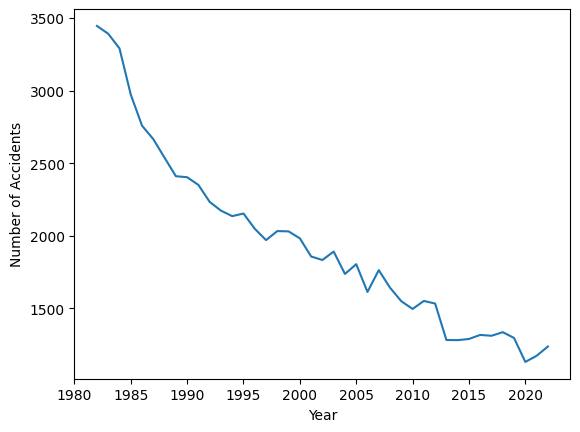

In [21]:
#Accidents per year plot
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
plot = sns.lineplot(x='Year',y='Event.Id',data = accidents_per_year)
plot.set_ylabel('Number of Accidents')

Text(0, 0.5, 'Number of Fatal Accidents')

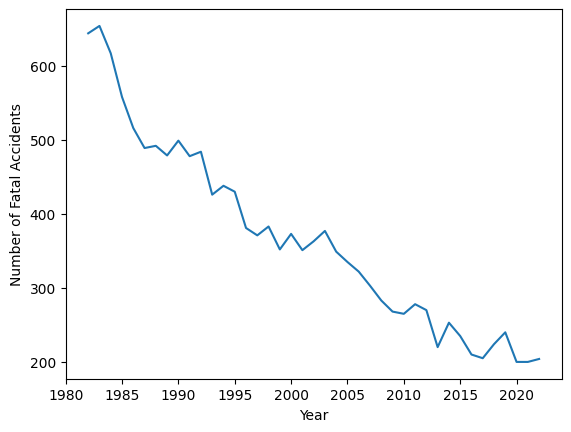

In [22]:
#How many of those are fatal per year?
fatal_accidents_per_year = df[df['Injury.Severity'] == 'Fatal'].groupby(['Year'], as_index = False)['Event.Id'].count()
plot = sns.lineplot(x='Year',y='Event.Id',data = fatal_accidents_per_year)
plot.set_ylabel('Number of Fatal Accidents')

In [23]:
# Calculate average fatality rate
injury_data = df[df['Injury.Severity'] != 'Unavailable']
averagefatal = len(injury_data[injury_data['Injury.Severity'] == 'Fatal'].index) / len(injury_data.index)
print("Average fatality rate: " + str(round(averagefatal * 100, 2)) + '%')

Average fatality rate: 18.8%


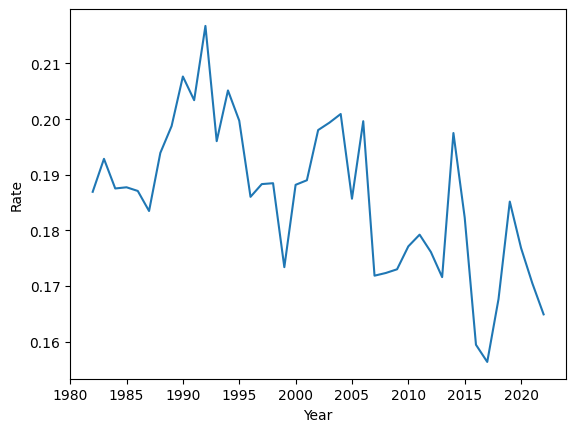

In [25]:
# Fatality rate per year
fatality_rate_per_year = pd.DataFrame()
fatality_rate_per_year['Rate'] = fatal_accidents_per_year['Event.Id'] / accidents_per_year['Event.Id']
fatality_rate_per_year['Year'] = accidents_per_year['Year']
sns.lineplot(x = 'Year', y = 'Rate', data = fatality_rate_per_year)
plot.set_ylabel('Fatalityy rate')
plt.show()

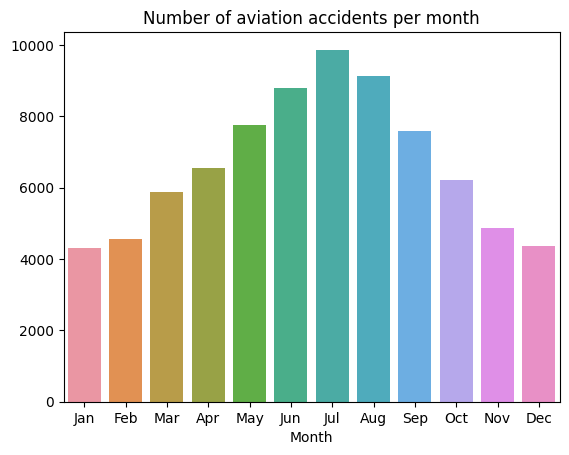

In [27]:
# Months with the most accidents
plot = sns.countplot(x = 'Month', data = df)
plot.set(xlabel = 'Month', ylabel = None, title = 'Number of aviation accidents per month')
plt.show()

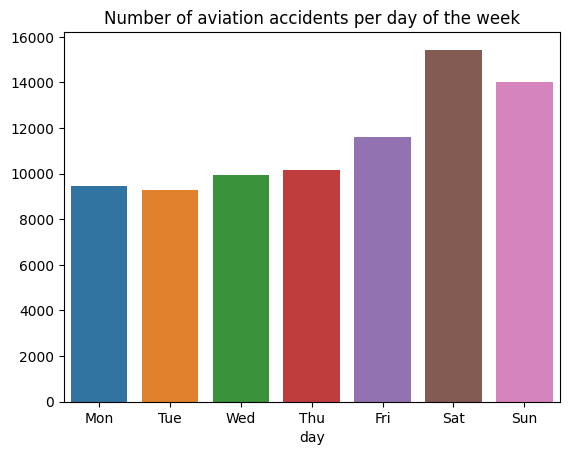

In [28]:
# Days with the most accidents
plot = sns.countplot(x = 'Day.Name', order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], data = df)
plot.set(xlabel = 'day', ylabel = None, title = 'Number of aviation accidents per day of the week')
plt.show()

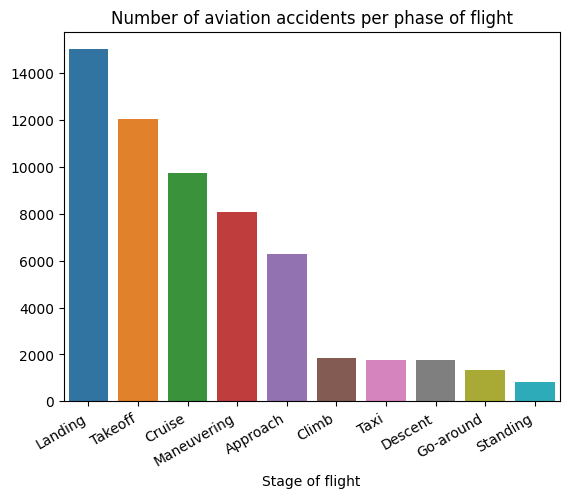

In [30]:
# At what stage do accidents happen
stage_of_flight_data = df[(df['Broad.phase.of.flight'] != 'Unknown') & (df['Broad.phase.of.flight'] != 'Other')]
plot = sns.countplot(x = 'Broad.phase.of.flight', order = stage_of_flight_data['Broad.phase.of.flight'].value_counts().index, data = stage_of_flight_data)
plot.set(xlabel = 'Stage of flight', ylabel = None, title = 'Number of aviation accidents per phase of flight')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30, ha = 'right')
plt.show()

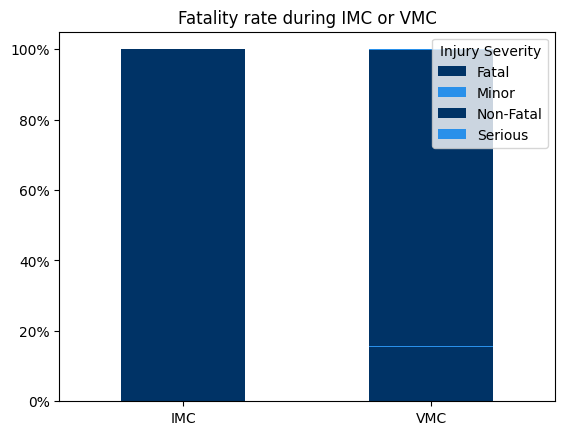

In [31]:
# Remove data without weather condition and injury severity
weather_data = injury_data[injury_data['Weather.Condition'] != 'Unknown']

# Stacked relative frequencies of accidents happening during certain weather conditions
weather_data.groupby('Weather.Condition')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').plot.bar(stacked = True, color = ['#003366','#2990EA'])

#Formatting
from matplotlib.ticker import PercentFormatter
plt.xticks(rotation = 0)
plt.title('Fatality rate during IMC or VMC')
plt.xlabel('')
plt.legend(title = "Injury Severity", loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

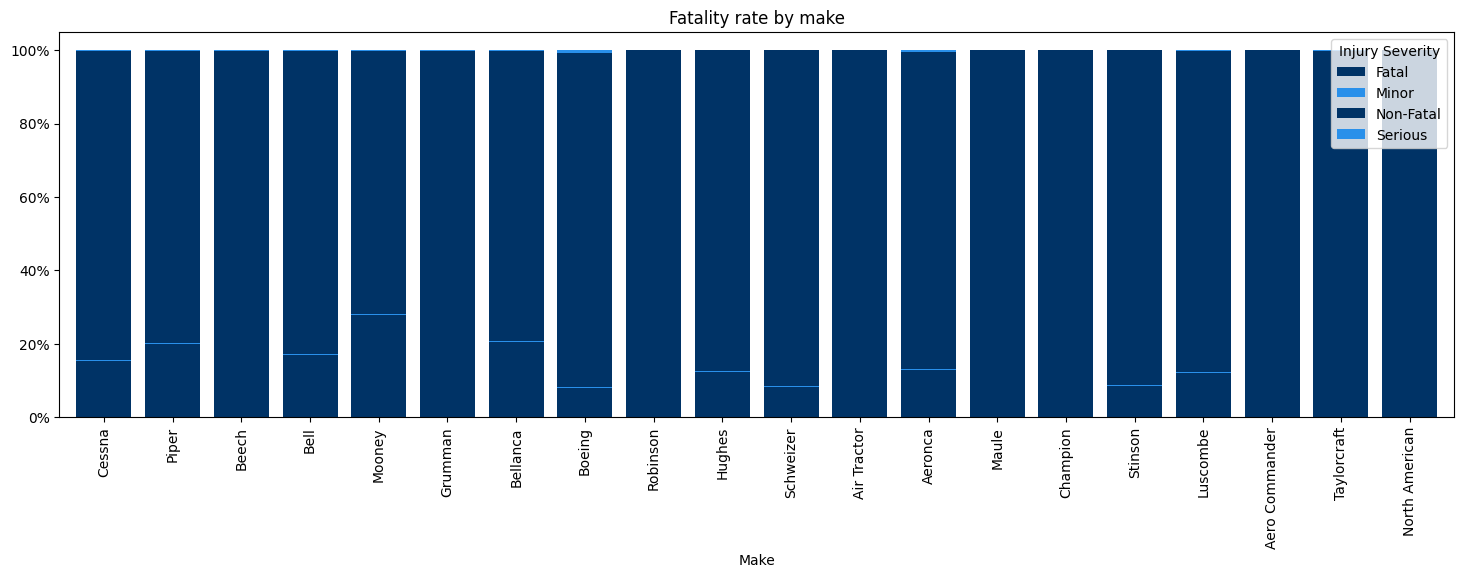

In [34]:
# Extract list of 20 makes most frequently involved in accidents
make_top20 = df['Make'].value_counts().nlargest(20).index.tolist()

# Only keep data with a make in the top list
make_data = injury_data[injury_data['Make'].isin(make_top20)]

# Percentage fatality by make
makefatal = make_data.groupby('Make')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').reindex(make_top20)
makefatal.plot.bar(stacked = True, figsize=(18,5), width = 0.8, color = ['#003366','#2990EA'])


#Formatting
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Fatality rate by make')
plt.legend(title = "Injury Severity", loc='upper right')
plt.show()

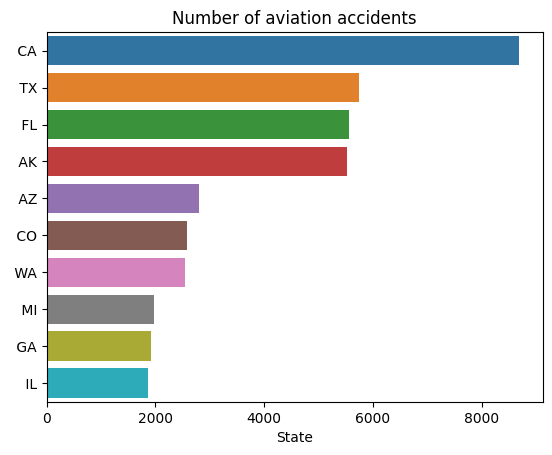

In [35]:
# Top 10 states with most accidents
top_10_states = df['State'].value_counts().head(10).index.tolist()
plot = sns.countplot(y = 'State', data = df,order=top_10_states)
plot.set(xlabel = 'State', ylabel = None, title = 'Number of aviation accidents')
plt.show()